In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PLAYERS = ['Carlos Alcaraz', 'Alexander Zverev', 'Frances Tiafoe',
           'Alejandro Davidovich Fokina', 'Daniil Medvedev', 'Jiri Lehecka',
           'Christopher Eubanks', 'Laslo Djere', 'Jannik Sinner', 'Daniel Elahi Galan',
           'Guido Pella', 'Denis Shapovalov', 'Andrey Rublev', 'Alexander Bublik',
           'Lorenzo Musetti', 'Stan Wawrinka', 'Grigor Dimitrov', 'Roman Safiullin',
           'Hubert Hurkacz', 'Nicolas Jarry', 'Matteo Berrettini', 'Holger Rune',
           'Marton Fucsovics', 'Tommy Paul', "Christopher O'Connell",
           'Stefanos Tsitsipas', 'Quentin Halys', 'Mikael Ymer', 'Liam Broady',
           'David Goffin', 'Maximilian Marterer', 'Novak Djokovic']


In [1]:
import numpy as np
from scipy.optimize import minimize

# 假设数据
scores = np.array([1, 0, 1, 1, 0, 1])  # 1表示得分，0表示未得分
times = np.array([0, 1, 2, 3, 4, 5])  # 尝试的时间点
qualities = np.random.rand(6)  # 每次尝试的质量评估

# 目标函数定义：最小化预测和实际之间的误差平方和
def objective(params):
    theta_0, theta_1, delta_plus, delta_minus, gamma = params
    predictions = np.array([theta_0 * (delta_plus * score + delta_minus * (1 - score) * np.exp(-gamma * time)) + theta_1 * quality
                            for score, time, quality in zip(scores, times, qualities)])
    # 计算误差
    error = np.sum((predictions - scores) ** 2)
    return error

# 参数的初始猜测
initial_guess = [0.5, 0.5, 1.0, -0.5, 0.1]

# 使用minimize函数寻找最佳参数
result = minimize(objective, initial_guess, method='L-BFGS-B')

# 输出最优参数
print(f"Optimal parameters: {result.x}")


Optimal parameters: [ 7.88720975e-01 -4.43224795e-07  1.26787610e+00  3.33926815e-06
  7.96480471e-01]


In [7]:
df = pd.read_csv("features.csv")

player = df['player'].iloc[0]
match_id = df.loc[df['player'] == player, 'match_id'].iloc[0]
print(player, match_id)
data = df.loc[(df['player'] == player) & (df['match_id'] == match_id)]
data.head(10)

Alejandro Davidovich Fokina 2023-wimbledon-1304


,player,match_id,set_no,game_no,point_no,p1_score,p2_score,y,if_score,if_nscore,...,game_point,break_point,break_fail,broken,rally_count,speed_mph,net_pt,serve_width,serve_depth,return_depth
0,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,1,1,0,0,1,1,0,...,0,0,0,0,1,86.0,0,B,NCTL,D
1,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,1,2,15,0,1,1,0,...,0,0,0,0,1,92.0,0,B,NCTL,D
2,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,1,3,30,0,1,1,0,...,0,0,0,0,1,102.0,0,W,CTL,ND
3,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,1,4,40,0,1,1,0,...,1,0,0,0,1,120.0,0,BW,CTL,ND
4,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,2,5,0,0,0,0,1,...,0,0,0,0,1,112.0,0,BW,NCTL,NaN
5,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,2,6,0,15,0,0,1,...,0,0,0,0,3,123.0,0,C,NCTL,ND
6,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,2,7,0,30,0,0,1,...,0,0,0,0,3,123.0,0,W,CTL,D
7,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,2,8,0,40,0,0,1,...,0,0,0,0,3,104.0,0,W,NCTL,ND
8,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,3,9,0,0,1,1,0,...,0,0,0,0,1,100.0,0,BC,NCTL,D
9,Alejandro Davidovich Fokina,2023-wimbledon-1304,1,3,10,15,0,1,1,0,...,0,0,0,0,1,114.0,0,C,NCTL,ND


In [25]:
# Store the columns as numpy arrays
scores = np.array(data['y'].values)
times = np.array(data['rally_count'].values)
qualities = np.array(data['speed_mph'].values)
if_server = np.array(data['if_server'].values)
n = len(scores)

In [13]:
print(scores)
print(times)
print(n)

[1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1
 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0
 0 0 0 0]
[ 1  1  1  1  1  3  3  3  1  1  3  7  2  0  5  1  6 11  1  4  1  5  1  1
  7  3  2  1  2  4  5  5  1  0  3  3  1  4  1  4  1  4  2  8  2  3  2  5
  5  2  3  3  2  2  8  2  5  2  2  1  9  1  1  5  1  1  2  4  0  1  4  1
  1  1  2  1  1  0  7  1  1  2  4  2  3  1  3  2  5  4  7  1 10  4  5  2
  2  1  1  4  4  0  8  

In [37]:
import numpy as np
from scipy.optimize import dual_annealing
from scipy.special import expit as sigmoid  # Sigmoid函数用于将线性预测转换为概率

# 假设数据
# n = 6  # 尝试次数
# scores = np.array([1, 0, 1, 1, 0, 1])  # 1表示得分，0表示未得分
# times = np.array([0, 1, 2, 3, 4, 5])  # 尝试的时间点
# qualities = np.random.rand(n)  # 每次尝试的质量评估

def if_score(i):
    return scores[i]

def if_nscore(i):
    return 1 - scores[i]

# 目标函数定义：最小化负对数似然函数
def objective(params):
    theta_0, theta_1, theta_2, delta_plus, delta_minus= params
    log_likelihood = 0
    for i in range(n):
        p_i = theta_0 * sum((delta_plus * if_score(j) + delta_minus * if_nscore(j)) for j in range(i-1)) + theta_1 * qualities[i] + theta_2 * qualities[i] * if_server[i]
        prob = sigmoid(p_i)  # 将线性预测转换为概率
        epsilon = 1e-10
        log_likelihood += scores[i] * np.log(prob + epsilon) + (1 - scores[i]) * np.log(1 - prob + epsilon)
    return -log_likelihood  # 返回负对数似然

# 参数的初始猜测
initial_guess = [0.05, 0.05, 0, 0.01, -0.03]

print(objective(initial_guess))

# 使用双模拟退火寻找最佳参数
result = dual_annealing(objective, bounds = [(-10,10),(-10,10),(-10,10),(-10,10),(-10,10)], maxiter=10)

# 输出最优参数
print(f"Optimal parameters: {result.x}")


924.0300094586154


KeyboardInterrupt: 

In [28]:
print(objective(result.x))


209.65791024131272


In [29]:
# 计算最优模型的对数似然值
optimal_log_likelihood = -objective(result.x)  # 注意：objective函数返回的是负对数似然

# 计算null模型的对数似然值
# Null模型假设所有的预测都是基于平均得分概率
avg_score_prob = np.mean(scores)
log_likelihood_null = np.sum(scores * np.log(avg_score_prob + 1e-10) + 
                             (1 - scores) * np.log(1 - avg_score_prob + 1e-10))

# 计算McFadden's R^2
r_squared_mcfadden = 1 - (optimal_log_likelihood / log_likelihood_null)

print(r_squared_mcfadden)


0.10245000391234982


In [35]:
# Logit + LASSO
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV


player = 'Carlos Alcaraz'

player_df = pd.read_csv(player + '.csv')

scaler = StandardScaler()
X = player_df[['if_server', 'weighted_sum_if_score', 'weighted_sum_if_win_game', 'weighted_sum_if_win_set',
               'weighted_sum_game_point','weighted_sum_break_point','weighted_sum_break_fail',
               'weighted_sum_broken','weighted_sum_rally_count'
]]
# X['if_server_speed_mph'] = X['if_server'] * X['speed_mph']  'if_server', 'speed_mph',, 'weighted_sum_if_nscore'

y = player_df['y']  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming X is your feature matrix and y is the target variable
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train_scaled = X_train#scaler.fit_transform(X_train)
X_test_scaled = X_test#scaler.transform(X_test)

model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

param_grid = {'C': np.logspace(-4, 4, 20)}
tscv = TimeSeriesSplit(n_splits=5)
gscv = GridSearchCV(model, param_grid, cv=tscv)
gscv.fit(X, y)
best_model = gscv.best_estimator_

In [36]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6239669421487604
              precision    recall  f1-score   support

           0       0.59      0.69      0.63       114
           1       0.67      0.56      0.61       128

    accuracy                           0.62       242
   macro avg       0.63      0.63      0.62       242
weighted avg       0.63      0.62      0.62       242



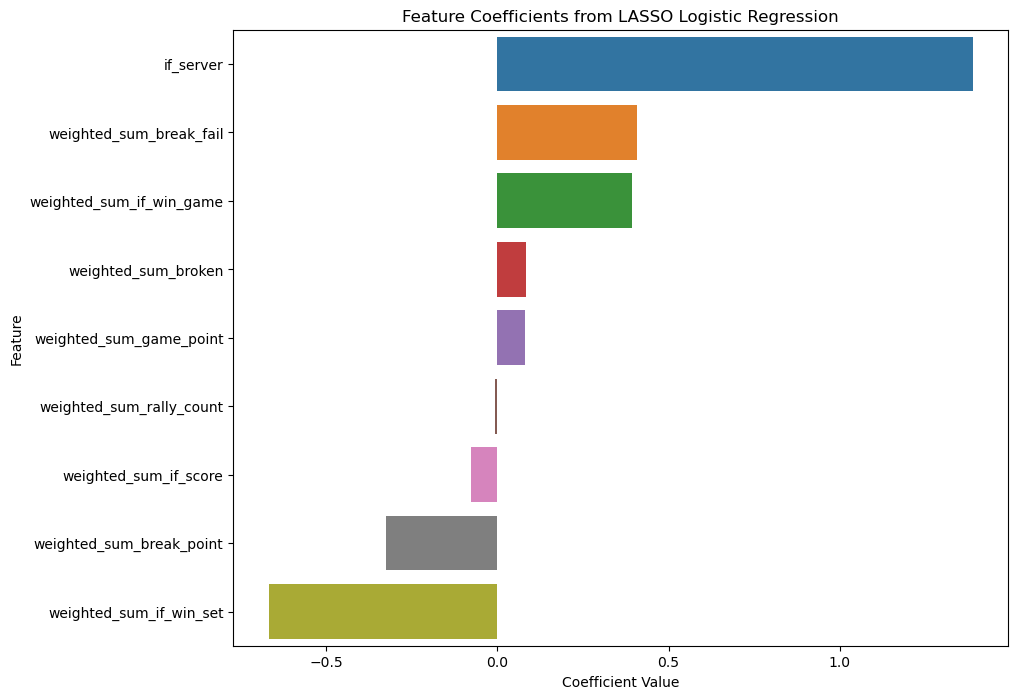

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设 best_model 是经过训练和调参的最佳模型
# 获取模型的系数
coefficients = model.coef_[0]

# 准备可视化的数据
# 假设你已经有了一个特征名称的列表 feature_names
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 由于系数可能有正有负，排序可以帮助更好地可视化
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 使用Seaborn绘制条形图
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients from LASSO Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()